# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).''' 
    return x**2*numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    return numpy.cos(x)*(2-x**2)+numpy.sin(x)*2*x-2

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    top = numpy.cos(xmax)*(2-xmax**2)+numpy.sin(xmax)*2*xmax
    bottom = numpy.cos(xmin)*(2-xmin**2)+numpy.sin(xmin)*2*xmin
    return top-bottom

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    h = (xmax-xmin)/(2*N)
    midpoints = 0
    endpoints = 0
    for i in range(1,N+1):
        midpoints = midpoints + 4*f(xmin+(2*i-1)*h)
    for j in range(1,N):
        endpoints = endpoints + 2*f(xmin+(2*j*h))
    edges = f(xmin) + f(xmax)
    area = (midpoints + endpoints + edges)*(h/3)
    return area

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Error in the Simpson Rule method for integration for increasing pannels')

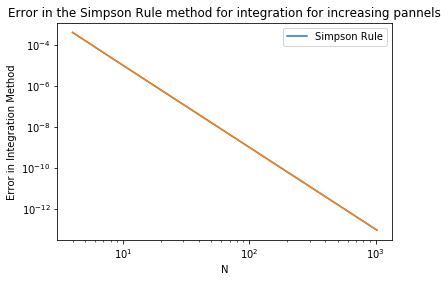

In [21]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
y_values = []
for N in panel_counts:
    y_values.append(result_analytic-integrate_numeric(x0,x1,N))    
plt.plot(panel_counts, y_values, label = "Simpson Rule")
plt.loglog(panel_counts, y_values)
plt.xlabel("N")
plt.ylabel("Error in Integration Method")
plt.legend()
plt.title("Error in the Simpson Rule method for integration for increasing pannels")

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The accuracy of the simpson rule will increase exponentially with panel count, N, up until N reaches a value of around 4*10^3, after this the large values of N cause the values of h to be small and as such causes some rounding errors when performing calculations.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The accuracy of the trapezium rule also increases exponentially as the panel count increases, however the trapezium rule is less accurate than the simpson rule for N under 10^6.